# Multilayer Perceptron (MNIST)

This notebook provides code to training and evaluating a multilayer perceptron on the MNIST dataset.

## Imports

In [29]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

## Load in the Data

In [5]:
# Transform to tensor and normalize to have a mean of 0.5 and a standard deviation of 0.5
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [18]:
print('Number of training images:', len(train_dataset))
print('Number of test images:', len(test_dataset))

Number of training images: 60000
Number of test images: 10000


### Visualize

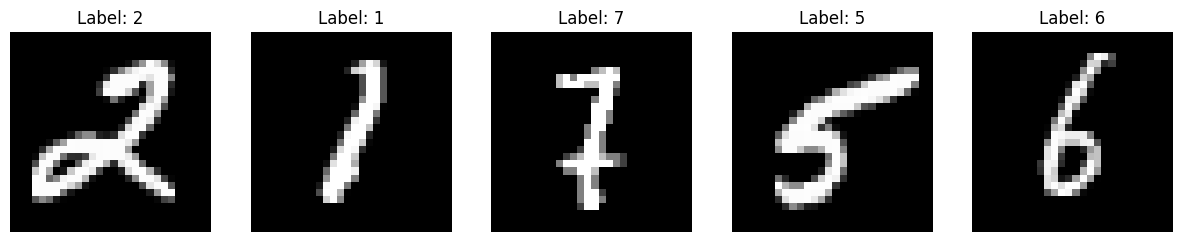

In [23]:
def visualize_image(image, label):
    image = image.numpy().squeeze()
    plt.figure(figsize=(4,4))
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

def plot_five_random(train_dataset):
    random_indexes = np.random.randint(0, len(train_dataset), 5)
    images = [train_dataset[i][0] for i in random_indexes]
    labels = [train_dataset[i][1] for i in random_indexes]

    plt.figure(figsize=(15, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')

plot_five_random(train_dataset)

## Define the MLP Architecture

In [32]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [44]:
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


## Loss Function and Optimizer

In [45]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Training

In [46]:
NUM_EPOCHS = 20
BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    valid_loss = 0.0
    train_corrects = 0
    valid_corrects = 0

    # Training
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss_value = loss(outputs, labels)
        loss_value.backward()
        optimizer.step()
        train_loss += loss_value.item()*images.size(0)
        train_corrects += torch.sum(torch.max(outputs, 1).indices == labels)

    # Validation
    for images, labels in valid_loader:
        outputs = model(images)
        loss_value = loss(outputs, labels)
        valid_loss += loss_value.item()*images.size(0)
        valid_corrects += torch.sum(torch.max(outputs, 1).indices == labels)

    train_loss = train_loss / len(train_loader.dataset)
    train_acc = train_corrects / len(train_loader.dataset)
    valid_loss = valid_loss / len(valid_loader.dataset)
    valid_acc = valid_corrects / len(valid_loader.dataset)

    print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Train Acc: {train_acc:.4f}, Valid Acc: {valid_acc:.4f}')

Epoch: 0, Train Loss: 1.0665, Valid Loss: 0.4478, Train Acc: 0.7151, Valid Acc: 0.8745
Epoch: 1, Train Loss: 0.3948, Valid Loss: 0.3379, Train Acc: 0.8858, Valid Acc: 0.9021
Epoch: 2, Train Loss: 0.3261, Valid Loss: 0.3229, Train Acc: 0.9057, Valid Acc: 0.9038
Epoch: 3, Train Loss: 0.2918, Valid Loss: 0.2705, Train Acc: 0.9146, Valid Acc: 0.9193
Epoch: 4, Train Loss: 0.2656, Valid Loss: 0.2463, Train Acc: 0.9220, Valid Acc: 0.9292
Epoch: 5, Train Loss: 0.2444, Valid Loss: 0.2303, Train Acc: 0.9288, Valid Acc: 0.9339
Epoch: 6, Train Loss: 0.2239, Valid Loss: 0.2116, Train Acc: 0.9344, Valid Acc: 0.9379
Epoch: 7, Train Loss: 0.2066, Valid Loss: 0.1986, Train Acc: 0.9404, Valid Acc: 0.9421
Epoch: 8, Train Loss: 0.1906, Valid Loss: 0.2030, Train Acc: 0.9444, Valid Acc: 0.9421
Epoch: 9, Train Loss: 0.1768, Valid Loss: 0.1682, Train Acc: 0.9485, Valid Acc: 0.9510
Epoch: 10, Train Loss: 0.1641, Valid Loss: 0.1543, Train Acc: 0.9523, Valid Acc: 0.9542
Epoch: 11, Train Loss: 0.1532, Valid Loss:

## Plot Results

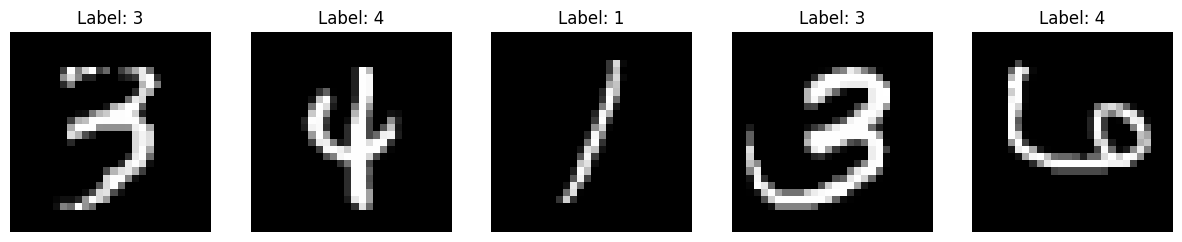

In [52]:
def plot_five_outputs(dataset):
    random_indexes = np.random.randint(0, len(dataset), 5)
    images = [dataset[i][0] for i in random_indexes]
    labels = model(torch.stack(images)).argmax(dim=1)

    plt.figure(figsize=(15, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')

plot_five_outputs(test_dataset)